In [17]:
import tensorflow as tf
import numpy as np


In [18]:
x = np.array([1,2,3,4,5,6,7,8,9,10],dtype=np.uint32)
y = np.array([a for a in x],dtype=np.uint32)

In [19]:
w = tf.Variable(0.0)
b = tf.Variable(0.0)

In [20]:
def mse(y_true,y_pre):
    return tf.metrics.mean_squared_error(y_true,y_pre)

In [21]:
def model(x):
    return w*x + b

In [22]:
learning_rate = 0.005
epochs = 0
loss = 1

In [23]:
while loss > 10**(-10):
    epochs += 1
    with tf.GradientTape() as tape:
        y_pre = model(x)
        loss = mse(y,y_pre)

    dw, db = tape.gradient(loss, [w,b])
    w.assign_sub(learning_rate*dw)
    b.assign_sub(learning_rate*db)

    print(f"epochs {epochs}: Loss = {loss.numpy():.4f}, w = {w.numpy():.4f}, b = {b.numpy():.4f}")

epochs 1: Loss = 38.5000, w = 0.3850, b = 0.0550
epochs 2: Loss = 14.1926, w = 0.6187, b = 0.0883
epochs 3: Loss = 5.2336, w = 0.7607, b = 0.1084
epochs 4: Loss = 1.9316, w = 0.8469, b = 0.1204
epochs 5: Loss = 0.7146, w = 0.8992, b = 0.1277
epochs 6: Loss = 0.2660, w = 0.9310, b = 0.1319
epochs 7: Loss = 0.1006, w = 0.9503, b = 0.1344
epochs 8: Loss = 0.0397, w = 0.9620, b = 0.1358
epochs 9: Loss = 0.0172, w = 0.9692, b = 0.1365
epochs 10: Loss = 0.0089, w = 0.9735, b = 0.1369
epochs 11: Loss = 0.0059, w = 0.9762, b = 0.1369
epochs 12: Loss = 0.0047, w = 0.9778, b = 0.1369
epochs 13: Loss = 0.0043, w = 0.9788, b = 0.1367
epochs 14: Loss = 0.0041, w = 0.9795, b = 0.1365
epochs 15: Loss = 0.0040, w = 0.9799, b = 0.1363
epochs 16: Loss = 0.0040, w = 0.9801, b = 0.1360
epochs 17: Loss = 0.0040, w = 0.9803, b = 0.1358
epochs 18: Loss = 0.0040, w = 0.9804, b = 0.1355
epochs 19: Loss = 0.0039, w = 0.9805, b = 0.1352
epochs 20: Loss = 0.0039, w = 0.9806, b = 0.1349
epochs 21: Loss = 0.0039, w

In [24]:
print(loss.numpy())

9.928982e-11


In [25]:
print(model([11,12,13]).numpy())
print(w.numpy(),b.numpy())

[10.999988 11.999984 12.999981]
0.99999684 2.1616086e-05


In [26]:
x = np.array([a for a in range(-200,200)],dtype=np.float64)
y = np.array([a**2 for a in x],dtype=np.float64)

In [27]:
x = x.reshape(-1,1)

In [40]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=64,input_shape=[1]),
     tf.keras.layers.Dense(units=32, activation="relu"),
     tf.keras.layers.Dense(units=16, activation="relu"),
     tf.keras.layers.Dense(units=8, activation="relu"),
     tf.keras.layers.Dense(units=1)]
)
model.compile(optimizer=tf.optimizers.Adam(learning_rate= 0.001),loss="mse")

In [41]:
model.fit(x,y,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 5ms/step - loss: 319514080.0000
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 318270240.0000
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 316271200.0000
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 312627072.0000
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 306170880.0000
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 294792416.0000
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 276213216.0000
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 248421216.0000
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 209330784.0000
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 160138880.0000
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 110093360.0000
Epoch 12/1000
13/13

In [34]:
y_pre = model.predict([2,3,4])

1/1 [==============================] - 0s 134ms/step


In [ ]:
print()

In [35]:
print(tf.metrics.mean_absolute_error([4,9,16],y_pre))

tf.Tensor([115.4754   113.90273  112.330055], shape=(3,), dtype=float32)


In [29]:
print(x.shape,y.shape)

(400, 1) (400,)


In [ ]:
import matplotlib.pyplot as plt

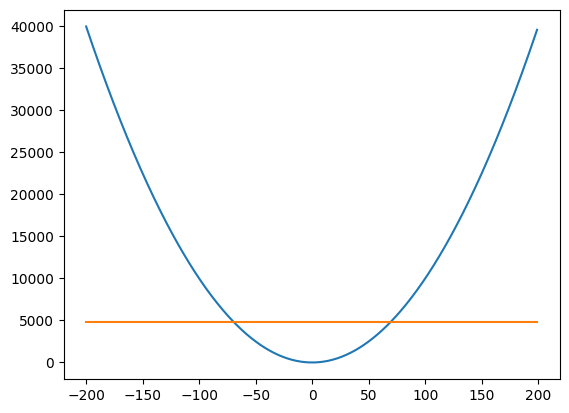

In [ ]:
plt.plot(x,y)
plt.plot(x,model(x))